In [20]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statistics
import random
from sklearn.linear_model import LinearRegression

In [2]:
#Read the Data File and store into Pandas DataFrames
filepath="../Resource/labs.csv"
df= pd.read_csv(filepath)
df.head(10)

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1
5,73562,123.0,123.0,74.0,6541.6,166.22,NaN,NaN,NaN,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750.0,553.5
6,73563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,73564,19.0,19.0,242.0,21392.8,7.85,134054.109760,77.0,0.77,3.9,...,0.253,0.0,0.115,0.0,0.0309,0.0,NaN,21.28,668.0,493.0
8,73566,1.3,1.3,18.0,1591.2,7.22,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378.0,279.0
9,73567,35.0,35.0,215.0,19006.0,16.28,NaN,NaN,NaN,4.0,...,0.148,0.0,0.078,0.0,0.0436,0.0,NaN,6.07,194.0,143.2


In [3]:
#defining the selected variables and extracting the table from the main data
cols_to_clean = ['SEQN','LBXTHG', 'LBXBSE', 'LBXBPB', 'LBXBMN', 'LBXBCD', 'LBXTR', 'LBDLDL', 'LBDHDD']
variable_df=df[cols_to_clean]
variable_df.head()

,SEQN,LBXTHG,LBXBSE,LBXBPB,LBXBMN,LBXBCD,LBXTR,LBDLDL,LBDHDD
0,73557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0
1,73558,1.21,204.73,1.69,8.15,0.20,NaN,NaN,50.0
2,73559,1.27,209.64,1.45,9.57,0.22,51.0,56.0,60.0
3,73560,0.88,169.82,0.37,13.07,0.07,NaN,NaN,61.0
4,73561,NaN,NaN,NaN,NaN,NaN,75.0,101.0,85.0


In [4]:
#dropping the rows with null cells
for col in variable_df:
    variable_df = variable_df.dropna(subset=[col])

In [5]:
variable_df.dtypes

SEQN        int64
LBXTHG    float64
LBXBSE    float64
LBXBPB    float64
LBXBMN    float64
LBXBCD    float64
LBXTR     float64
LBDLDL    float64
LBDHDD    float64
dtype: object

In [6]:
#renaming the variables
df2=variable_df.rename(columns={
    "SEQN":"patient ID",
    "LBXTHG":"mercury (ug/L)", 
    "LBXBSE":"selenium(ug/L)", 
    "LBXBPB":"lead(ug/dL)", 
    "LBXBMN": "manganese(ug/L)", 
    "LBXBCD":"cadmium(ug/L)", 
    "LBXTR":"triglycerides(mg/dL)", 
    "LBDLDL":"LDL-cholesterol(mg/dL)", 
    "LBDHDD":"HDL-Cholesterol(mg/dL)"
})

In [7]:
#double check the clean data
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1555 entries, 2 to 9799
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patient ID              1555 non-null   int64  
 1   mercury (ug/L)          1555 non-null   float64
 2   selenium(ug/L)          1555 non-null   float64
 3   lead(ug/dL)             1555 non-null   float64
 4   manganese(ug/L)         1555 non-null   float64
 5   cadmium(ug/L)           1555 non-null   float64
 6   triglycerides(mg/dL)    1555 non-null   float64
 7   LDL-cholesterol(mg/dL)  1555 non-null   float64
 8   HDL-Cholesterol(mg/dL)  1555 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 121.5 KB


In [8]:
df2.head()

,patient ID,mercury (ug/L),selenium(ug/L),lead(ug/dL),manganese(ug/L),cadmium(ug/L),triglycerides(mg/dL),LDL-cholesterol(mg/dL),HDL-Cholesterol(mg/dL)
2,73559,1.27,209.64,1.45,9.57,0.22,51.0,56.0,60.0
7,73564,0.42,195.62,1.00,16.80,0.37,64.0,97.0,58.0
21,73580,0.46,188.00,0.31,4.22,0.07,57.0,159.0,55.0
48,73607,0.33,219.00,1.35,8.31,0.50,139.0,103.0,30.0
62,73621,0.87,212.84,1.38,8.14,0.36,78.0,70.0,75.0


In [9]:
# Reset Index
lab_df = df2.reset_index(drop = True)
lab_df.head()

,patient ID,mercury (ug/L),selenium(ug/L),lead(ug/dL),manganese(ug/L),cadmium(ug/L),triglycerides(mg/dL),LDL-cholesterol(mg/dL),HDL-Cholesterol(mg/dL)
0,73559,1.27,209.64,1.45,9.57,0.22,51.0,56.0,60.0
1,73564,0.42,195.62,1.00,16.80,0.37,64.0,97.0,58.0
2,73580,0.46,188.00,0.31,4.22,0.07,57.0,159.0,55.0
3,73607,0.33,219.00,1.35,8.31,0.50,139.0,103.0,30.0
4,73621,0.87,212.84,1.38,8.14,0.36,78.0,70.0,75.0


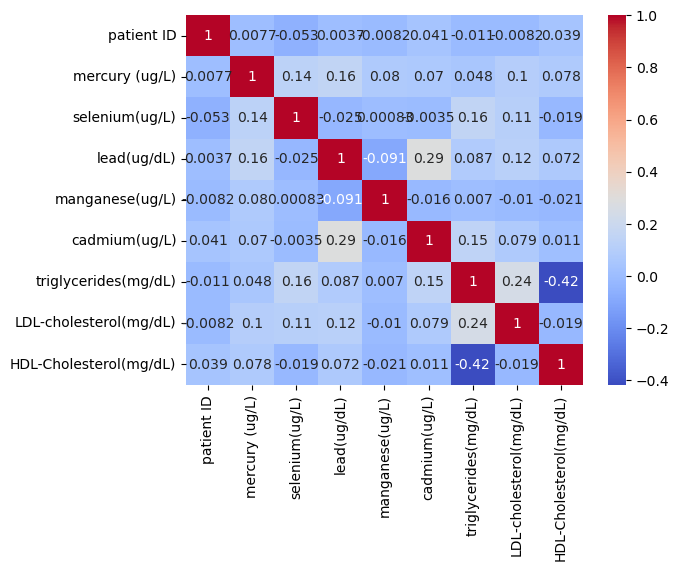

In [10]:
corr_matrix = lab_df.corr()
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [11]:
# set diagonal elements to zero
corr_matrix.values[[i for i in range(corr_matrix.shape[0])], [i for i in range(corr_matrix.shape[0])]] = 0

# print the correlation matrix with diagonal elements set to zero
print(corr_matrix)

                        patient ID  mercury (ug/L)  selenium(ug/L)  \
patient ID                0.000000        0.007720       -0.053107   
mercury (ug/L)            0.007720        0.000000        0.135168   
selenium(ug/L)           -0.053107        0.135168        0.000000   
lead(ug/dL)               0.003745        0.156329       -0.024954   
manganese(ug/L)          -0.008162        0.079885        0.000831   
cadmium(ug/L)             0.040856        0.069933       -0.003515   
triglycerides(mg/dL)     -0.010643        0.048068        0.156563   
LDL-cholesterol(mg/dL)   -0.008249        0.102874        0.114189   
HDL-Cholesterol(mg/dL)    0.038680        0.077589       -0.019119   

                        lead(ug/dL)  manganese(ug/L)  cadmium(ug/L)  \
patient ID                 0.003745        -0.008162       0.040856   
mercury (ug/L)             0.156329         0.079885       0.069933   
selenium(ug/L)            -0.024954         0.000831      -0.003515   
lead(ug/dL)    

In [12]:
# stack the correlation matrix and sort by correlation coefficient
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)

# print the top 10 correlation pairs
print(corr_pairs[:20])

cadmium(ug/L)           lead(ug/dL)               0.291458
lead(ug/dL)             cadmium(ug/L)             0.291458
LDL-cholesterol(mg/dL)  triglycerides(mg/dL)      0.244445
triglycerides(mg/dL)    LDL-cholesterol(mg/dL)    0.244445
                        selenium(ug/L)            0.156563
selenium(ug/L)          triglycerides(mg/dL)      0.156563
lead(ug/dL)             mercury (ug/L)            0.156329
mercury (ug/L)          lead(ug/dL)               0.156329
cadmium(ug/L)           triglycerides(mg/dL)      0.146854
triglycerides(mg/dL)    cadmium(ug/L)             0.146854
mercury (ug/L)          selenium(ug/L)            0.135168
selenium(ug/L)          mercury (ug/L)            0.135168
lead(ug/dL)             LDL-cholesterol(mg/dL)    0.118457
LDL-cholesterol(mg/dL)  lead(ug/dL)               0.118457
                        selenium(ug/L)            0.114189
selenium(ug/L)          LDL-cholesterol(mg/dL)    0.114189
mercury (ug/L)          LDL-cholesterol(mg/dL)    0.1028

In [13]:
# most relevant correlations are between "selenium(ug/L)" and "triglycerides(mg/dL)", "cadmium(ug/L)" and "triglycerides(mg/dL)"
# "lead(ug/dL)" and "LDL-cholesterol(mg/dL)" & "selenium(ug/L)" and "LDL-cholesterol(mg/dL)"
# create new dataframe with only relevant fields
red_lab_df = lab_df[["patient ID","selenium(ug/L)","cadmium(ug/L)","lead(ug/dL)","triglycerides(mg/dL)", "LDL-cholesterol(mg/dL)" ]]
red_lab_df.head()

,patient ID,selenium(ug/L),cadmium(ug/L),lead(ug/dL),triglycerides(mg/dL),LDL-cholesterol(mg/dL)
0,73559,209.64,0.22,1.45,51.0,56.0
1,73564,195.62,0.37,1.00,64.0,97.0
2,73580,188.00,0.07,0.31,57.0,159.0
3,73607,219.00,0.50,1.35,139.0,103.0
4,73621,212.84,0.36,1.38,78.0,70.0


In [14]:
# define the bins and labels for "triglycerides(mg/dL)" according to 
# "https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/in-depth/triglycerides/art-20048186"
bins = [0, 150, 200, 500, float('inf')]
labels = ['Normal', 'Borderline high', 'High', 'Very high']

# create a new column with the bin labels
red_lab_df['triglycerides_class'] = pd.cut(red_lab_df['triglycerides(mg/dL)'], bins=bins, labels=labels)

# define the bins and labels for "LDL-cholesterol(mg/dL)" acccording to 
# "https://www.mayoclinic.org/tests-procedures/cholesterol-test/about/pac-20384601"
bins = [0, 130, 160, 190, float('inf')]
labels = ['Normal', 'Borderline high', 'High', 'Very high']

# create a new column with the bin labels
red_lab_df['LDL-cholesterol_class'] = pd.cut(red_lab_df['LDL-cholesterol(mg/dL)'], bins=bins, labels=labels)

# reorganize columns
new_column_order = ['patient ID', 'selenium(ug/L)', 'cadmium(ug/L)', 'lead(ug/dL)', 'triglycerides(mg/dL)', 'triglycerides_class', 'LDL-cholesterol(mg/dL)', 'LDL-cholesterol_class']
red_lab_df = red_lab_df.reindex(columns=new_column_order)

red_lab_df.sample(20)

C:\Users\Victor\AppData\Local\Temp\ipykernel_37324\1840819987.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_lab_df['triglycerides_class'] = pd.cut(red_lab_df['triglycerides(mg/dL)'], bins=bins, labels=labels)
C:\Users\Victor\AppData\Local\Temp\ipykernel_37324\1840819987.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_lab_df['LDL-cholesterol_class'] = pd.cut(red_lab_df['LDL-cholesterol(mg/dL)'], bins=bins, labels=labels)


,patient ID,selenium(ug/L),cadmium(ug/L),lead(ug/dL),triglycerides(mg/dL),triglycerides_class,LDL-cholesterol(mg/dL),LDL-cholesterol_class
504,76963,212.09,0.17,2.12,121.0,Normal,133.0,Borderline high
309,75699,201.76,0.13,0.76,92.0,Normal,121.0,Normal
1139,80873,183.48,0.45,1.19,68.0,Normal,97.0,Normal
811,78959,166.92,0.56,1.28,52.0,Normal,58.0,Normal
206,74955,185.58,0.39,0.54,46.0,Normal,125.0,Normal
467,76733,177.19,0.20,1.28,129.0,Normal,62.0,Normal
1278,81825,209.58,0.61,1.00,200.0,Borderline high,78.0,Normal
144,74566,201.33,1.57,1.15,331.0,High,160.0,Borderline high
291,75557,185.43,0.07,0.44,192.0,Borderline high,168.0,High
117,74394,232.48,0.24,0.75,51.0,Normal,122.0,Normal


In [15]:
# calculate mean, median, mode, average, quartiles, IQR, and lower/upper boundaries for metal concentrations

columns = ["selenium(ug/L)", "cadmium(ug/L)", "lead(ug/dL)"]
for col in columns:
    mean = round(red_lab_df[col].mean(), 2)
    median = round(red_lab_df[col].median(), 2)
    mode = round(red_lab_df[col].mode()[0], 2)
    stdev = round(red_lab_df[col].std(), 2)
    quartiles = red_lab_df[col].quantile([0.25, 0.5, 0.75])
    q1, q2, q3 = quartiles
    iqr = round(q3 - q1, 2)
    lower_boundary = round(q1 - 1.5 * iqr, 2)
    upper_boundary = round(q3 + 1.5 * iqr, 2)

    # calculate number of outliers
    lower_outliers = red_lab_df[red_lab_df[col] < lower_boundary]
    upper_outliers = red_lab_df[red_lab_df[col] > upper_boundary]
    num_lower_outliers = len(lower_outliers)
    num_upper_outliers = len(upper_outliers)
    
    # print results
    print("For", col)
    print("Mean:", mean)
    print("Median:", median)
    print("Mode:", mode)
    print("Standard Deviation:", stdev)
    print("First Quartile:", round(q1, 2))
    print("Second Quartile (Median):", round(q2, 2))
    print("Third Quartile:", round(q3, 2))
    print("Interquartile Range (IQR):", iqr)
    print("Lower Boundaries for Outliers:", lower_boundary)
    print("Upper Boundaries for Outliers:", upper_boundary)
    print("Number of Lower Outliers:", num_lower_outliers)
    print("Number of Upper Outliers:", num_upper_outliers)
    print("-----------------------------------------------")


For selenium(ug/L)
Mean: 196.81
Median: 194.69
Mode: 182.56
Standard Deviation: 23.96
First Quartile: 181.28
Second Quartile (Median): 194.69
Third Quartile: 209.23
Interquartile Range (IQR): 27.95
Lower Boundaries for Outliers: 139.36
Upper Boundaries for Outliers: 251.16
Number of Lower Outliers: 7
Number of Upper Outliers: 30
-----------------------------------------------
For cadmium(ug/L)
Mean: 0.44
Median: 0.26
Mode: 0.07
Standard Deviation: 0.53
First Quartile: 0.15
Second Quartile (Median): 0.26
Third Quartile: 0.53
Interquartile Range (IQR): 0.38
Lower Boundaries for Outliers: -0.42
Upper Boundaries for Outliers: 1.1
Number of Lower Outliers: 0
Number of Upper Outliers: 126
-----------------------------------------------
For lead(ug/dL)
Mean: 1.22
Median: 0.92
Mode: 0.42
Standard Deviation: 1.15
First Quartile: 0.54
Second Quartile (Median): 0.92
Third Quartile: 1.47
Interquartile Range (IQR): 0.93
Lower Boundaries for Outliers: -0.85
Upper Boundaries for Outliers: 2.87
Number

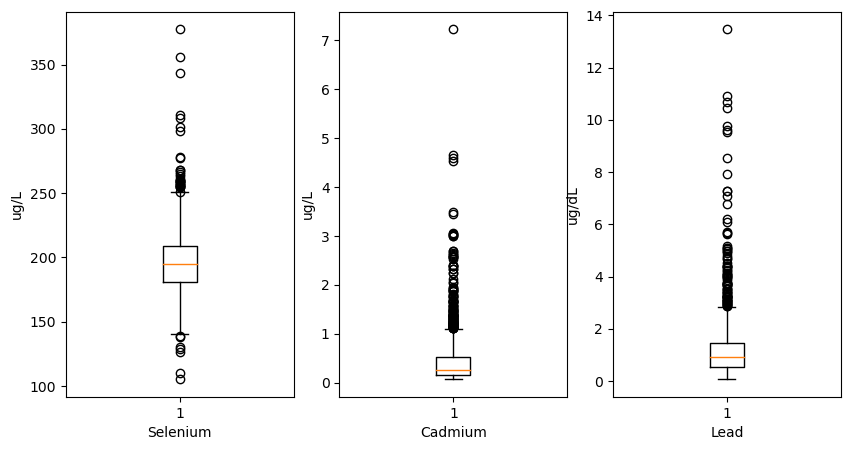

In [16]:
# create three separate boxplots
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].boxplot(red_lab_df["selenium(ug/L)"])
axs[0].set_xlabel("Selenium")
axs[0].set_ylabel("ug/L")

axs[1].boxplot(red_lab_df["cadmium(ug/L)"])
axs[1].set_xlabel("Cadmium")
axs[1].set_ylabel("ug/L")

axs[2].boxplot(red_lab_df["lead(ug/dL)"])
axs[2].set_xlabel("Lead")
axs[2].set_ylabel("ug/dL")

plt.show()

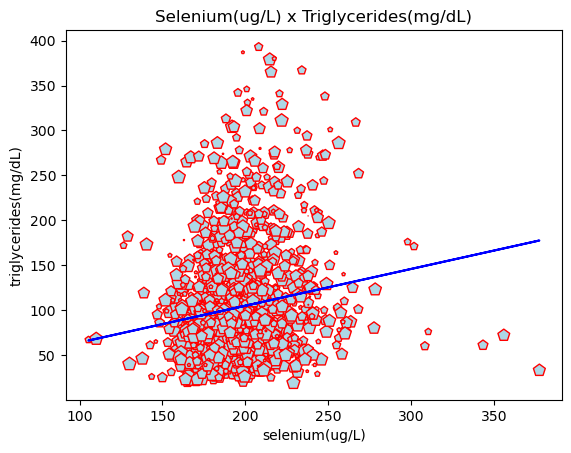

In [21]:
size = [random.uniform(0,1)*100 for _ in (red_lab_df["selenium(ug/L)"])]
##print(size)
##plt.scatter(df2["selenium(ug/L)"], df2["triglycerides(mg/dL)"], marker= "o", facecolors= "lightblue", edgecolors= "red ", s= size)

plt.scatter(red_lab_df["selenium(ug/L)"], red_lab_df["triglycerides(mg/dL)"], marker= "p", facecolors= ["lightblue"], edgecolors= ["red"], s= size)

# Add linear regression line
model = LinearRegression()
model.fit(red_lab_df["selenium(ug/L)"].values.reshape(-1, 1), red_lab_df["triglycerides(mg/dL)"])
x_line = red_lab_df["selenium(ug/L)"].values.reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color="blue")

# Add labels and title
plt.xlabel("selenium(ug/L)")
plt.ylabel("triglycerides(mg/dL)")
plt.title("Selenium(ug/L) x Triglycerides(mg/dL)")
plt.savefig("myGraph.png")

# Show the plot
plt.show()

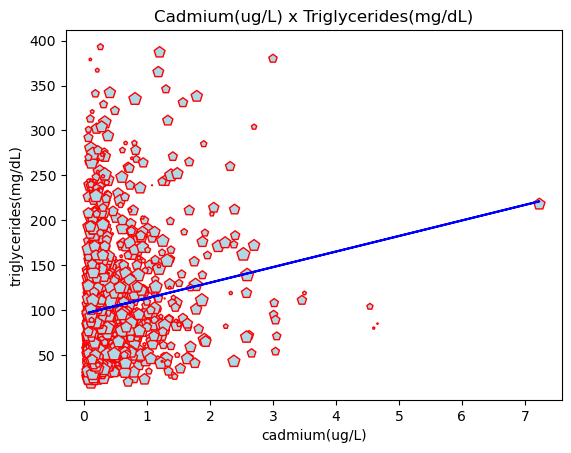

In [23]:
size = [random.uniform(0, 1) * 100 for _ in (red_lab_df["cadmium(ug/L)"])]
plt.scatter(red_lab_df["cadmium(ug/L)"], red_lab_df["triglycerides(mg/dL)"], marker="p", facecolors=["lightblue"], edgecolors=["red"], s=size)

# Add linear regression line
model = LinearRegression()
model.fit(red_lab_df["cadmium(ug/L)"].values.reshape(-1, 1), red_lab_df["triglycerides(mg/dL)"])
x_line = red_lab_df["cadmium(ug/L)"].values.reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color="blue")

# Add labels and title 
plt.xlabel("cadmium(ug/L)")
plt.ylabel("triglycerides(mg/dL)")
plt.title("Cadmium(ug/L) x Triglycerides(mg/dL)")
plt.savefig("myGraph.png")

# Show the plot
plt.show()

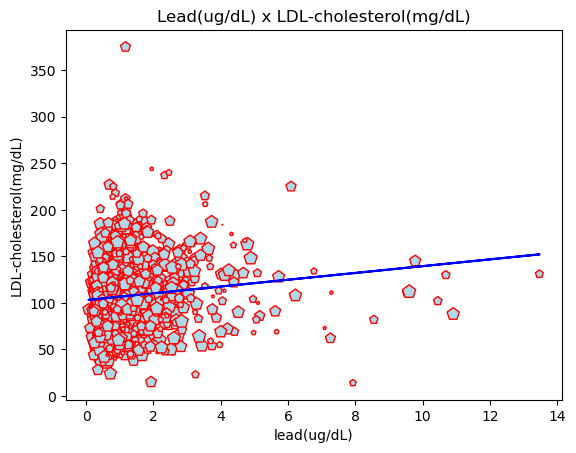

In [22]:
size = [random.uniform(0, 1) * 100 for _ in (red_lab_df["lead(ug/dL)"])]
plt.scatter(red_lab_df["lead(ug/dL)"], red_lab_df["LDL-cholesterol(mg/dL)"], marker="p", facecolors=["lightblue"], edgecolors=["red"], s=size)

# Add linear regression line
model = LinearRegression()
model.fit(red_lab_df["lead(ug/dL)"].values.reshape(-1, 1), red_lab_df["LDL-cholesterol(mg/dL)"])
x_line = red_lab_df["lead(ug/dL)"].values.reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color="blue")

# Add labels and title 
plt.xlabel("lead(ug/dL)")
plt.ylabel("LDL-cholesterol(mg/dL)")
plt.title("Lead(ug/dL) x LDL-cholesterol(mg/dL)")
plt.savefig("myGraph.png")

# Show the plot
plt.show()

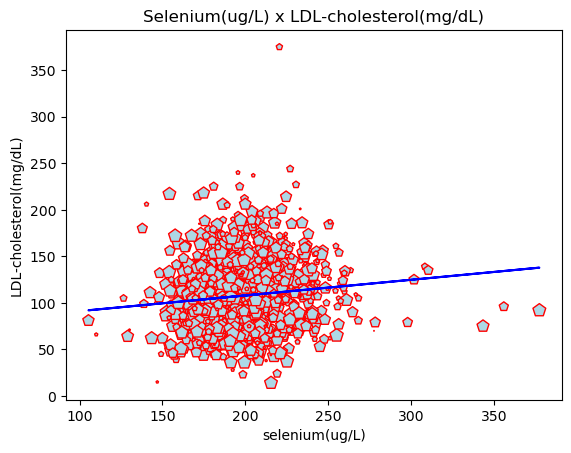

In [24]:
size = [random.uniform(0, 1) * 100 for _ in (red_lab_df["selenium(ug/L)"])]
plt.scatter(red_lab_df["selenium(ug/L)"], red_lab_df["LDL-cholesterol(mg/dL)"], marker="p", facecolors=["lightblue"], edgecolors=["red"], s=size)

# Add linear regression line
model = LinearRegression()
model.fit(red_lab_df["selenium(ug/L)"].values.reshape(-1, 1), red_lab_df["LDL-cholesterol(mg/dL)"])
x_line = red_lab_df["selenium(ug/L)"].values.reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color="blue")

# Add labels and title 
plt.xlabel("selenium(ug/L)")
plt.ylabel("LDL-cholesterol(mg/dL)")
plt.title("Selenium(ug/L) x LDL-cholesterol(mg/dL)")
plt.savefig("myGraph.png")

# Show the plot
plt.show()